In [2]:
import Pkg;
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
using Catalyst; 

include("reactionsReLU.jl")
include("utils.jl")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


sequester_params (generic function with 1 method)

In [15]:
rn = @reaction_network begin
    1.0, z + z --> z
end

rn_dual = @reaction_network begin
    # dz_m/dt = -2z_pz_m
    1.0, zp + zp --> zp 
    1.0, zm + zm --> zm # dz_p/dt = -z_p^2
    100.0, zp + zm --> 0
end

rn_back = @reaction_network begin
    1.0, z + z --> z + z + z
end

rn_back_dual = @reaction_network begin
    100.0, zp + zm --> 0
    1.0, zp + zp --> zp + zp + zp
    1.0, zm + zm --> zm + zm + zm
end

Model ##ReactionSystem#355
States (2):
  zp(t)
  zm(t)
Parameters (0):

In [16]:
oprob = ODEProblem(rn, [1.0], (0.0, 1.0), [])
sol = solve(oprob, TRBDF2(autodiff=false), reltol=1e-4, abstol=1e-6, maxiters=1000)

dprob = ODEProblem(rn_dual, [1.5, 0.5], (0.0, 1.0), [])
dsol = solve(dprob, TRBDF2(autodiff=false), reltol=1e-4, abstol=1e-6, maxiters=1000)
zps = getindex.(dsol.u, 1)
zms = getindex.(dsol.u, 2)
zdiff = zps .- zms

21-element Vector{Float64}:
 1.0
 0.9999932677346537
 0.9999261349771964
 0.9992727557169476
 0.9972944833652391
 0.9959439181302752
 0.9925073192623011
 0.9905367099211836
 0.9859194624721742
 0.9832756207119678
 ⋮
 0.9665419562986188
 0.9610471573947891
 0.9474316754917066
 0.934198384741945
 0.8924367368647677
 0.8262849613132782
 0.7647986179906426
 0.6890186373578971
 0.6645437308663471

In [23]:
plot(sol)
plot!(dsol.t, zdiff, linestyle=:dash)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /Users/rajiv/.julia/packages/SciMLBase/XxTxA/src/integrator_interface.jl:585


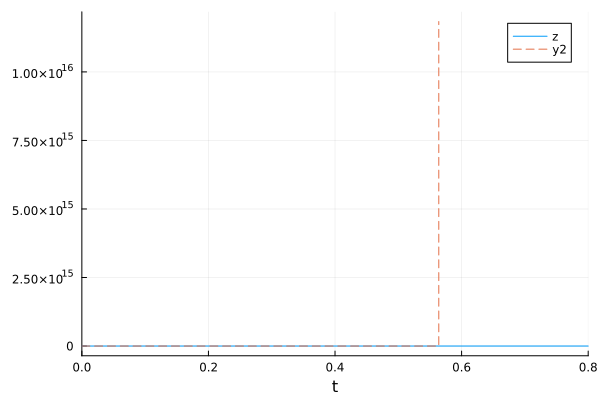

In [25]:
bprob = ODEProblem(rn_back, [1.0], (0.0, 0.8), [])
bsol = solve(bprob, TRBDF2(autodiff=false), reltol=1e-4, abstol=1e-6, maxiters=1000)
bdprob = ODEProblem(rn_back_dual, [4.0, 0.5], (0.0, 1.0), [])
bdsol = solve(bdprob, TRBDF2(autodiff=false), reltol=1e-4, abstol=1e-6, maxiters=1000)
zps = getindex.(bdsol.u, 1)
zms = getindex.(bdsol.u, 2)
zdiff = zps .- zms
plot(bsol)
plot!(bdsol.t, zdiff, linestyle=:dash)

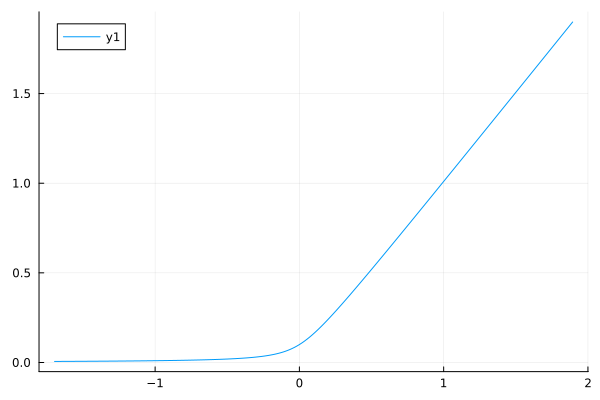

In [45]:
params = create_node_params(3, t0=0.0, t1=.0, h=0.01)
dims, theta, beta, w, h, _, _ = sequester_params(params)
x = [-0.33453041315078735, -0.7561364769935608, 0.0]
xplot = rand(Uniform(-2, 2), 1000)
sort!(xplot)
index = 1
xs = []
yplot = []
for i in eachindex(xplot)
    x = zeros(dims)
    x[index] = xplot[i]
    rho = theta * x + beta
    rhoindex = rho[index]
    push!(xs, rhoindex)
    push!(yplot, (rhoindex + sqrt(rhoindex^2 + 4 * h)) / 2)
end

xys = Pair.(xs, yplot)
sort!(xys)
xs = getindex.(xys, 1)
ys = getindex.(xys, 2)
plot(xs, ys)